In [122]:
from PIL import Image
import os, glob
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [123]:
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size=(28,28)
    for img in images:
        old_img = Image.open(img)
        old_img_gray = old_img.convert('L')
        new_img=old_img_gray.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    print(len(images), " images resized.")

In [125]:
def load_data(img_path, number_of_data=1800):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=1
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,0]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,0]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,0]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("데이터의 이미지 개수는", idx,"입니다.")
    return imgs, labels

In [124]:
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/train/scissor"
resize_images(image_dir_path)
print("가위 이미지 resize 완료!")

# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/train/rock"
resize_images(image_dir_path)
print("바위 이미지 resize 완료!")

# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/train/paper"
resize_images(image_dir_path)
print("보 이미지 resize 완료!")

In [170]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/people"
# (x_train, y_train)=load_data(image_dir_path)
X, y = load_data(image_dir_path)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)
X_train_norm = X_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))

데이터의 이미지 개수는 1797 입니다.
X_train shape: (1440, 28, 28, 1)
X_test shape: (360, 28, 28, 1)
y_train shape: (1440,)
y_test shape: (360,)


라벨:  0


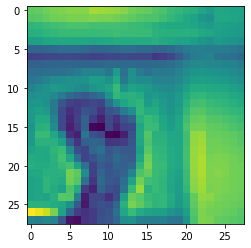

In [171]:
plt.imshow(X_train[-1])
print('라벨: ', y_train[0])

In [172]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28,1)),
                          keras.layers.Reshape(target_shape=(28,28,1)),
                          keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation=tf.nn.relu),
                          keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation=tf.nn.relu),
                          keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation=tf.nn.relu),
                          keras.layers.MaxPooling2D(pool_size=(2,2)),
                          keras.layers.Dropout(0.25),
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(128, activation=tf.nn.relu),
                          keras.layers.Dropout(0.5),
                          keras.layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_33 (Flatten)         (None, 784)               0         
_________________________________________________________________
reshape_14 (Reshape)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 22, 22, 32)        18464     
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 11, 11, 32)        0         
_________________________________________________________________
dropout_28 (Dropout)         (None, 11, 11, 32)      

In [173]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_norm, y_train, epochs=10, batch_size=16)

Epoch 1/10
90/90 [==============================] - 1s 8ms/step - loss: 1.0857 - accuracy: 0.3879
Epoch 2/10
90/90 [==============================] - 1s 8ms/step - loss: 0.6529 - accuracy: 0.7350
Epoch 3/10
90/90 [==============================] - 1s 8ms/step - loss: 0.3566 - accuracy: 0.8704
Epoch 4/10
90/90 [==============================] - 1s 8ms/step - loss: 0.2040 - accuracy: 0.9246
Epoch 5/10
90/90 [==============================] - 1s 8ms/step - loss: 0.1687 - accuracy: 0.9413
Epoch 6/10
90/90 [==============================] - 1s 8ms/step - loss: 0.0725 - accuracy: 0.9774
Epoch 7/10
90/90 [==============================] - 1s 8ms/step - loss: 0.0724 - accuracy: 0.9744
Epoch 8/10
90/90 [==============================] - 1s 8ms/step - loss: 0.0523 - accuracy: 0.9807
Epoch 9/10
90/90 [==============================] - 1s 8ms/step - loss: 0.0307 - accuracy: 0.9886
Epoch 10/10
90/90 [==============================] - 1s 8ms/step - loss: 0.0263 - accuracy: 0.9931


In [174]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy: ", test_acc)

12/12 [==============================] - 0s 3ms/step - loss: 25.5542 - accuracy: 0.9222
Test Accuracy:  0.9222221970558167
